In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy.stats import pearsonr
import sklearn
import sklearn.linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('df3_2.csv', sep = ';')
df.head()

Saving df3_2.csv to df3_2 (2).csv


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 10', 'Unnamed: 11'], axis = 1)

In [ ]:
df = df.dropna()
print(df)

       X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
..    ...    ...    ...     ...  ...  ...  ...  ...    ...    ...
763  0.64  784.0  343.0  220.50  3.5  5.0  0.4  5.0  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5  2.0  0.4  5.0  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5  3.0  0.4  5.0  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5  4.0  0.4  5.0  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5  5.0  0.4  5.0  16.64  16.03

[768 rows x 10 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 66.0 KB


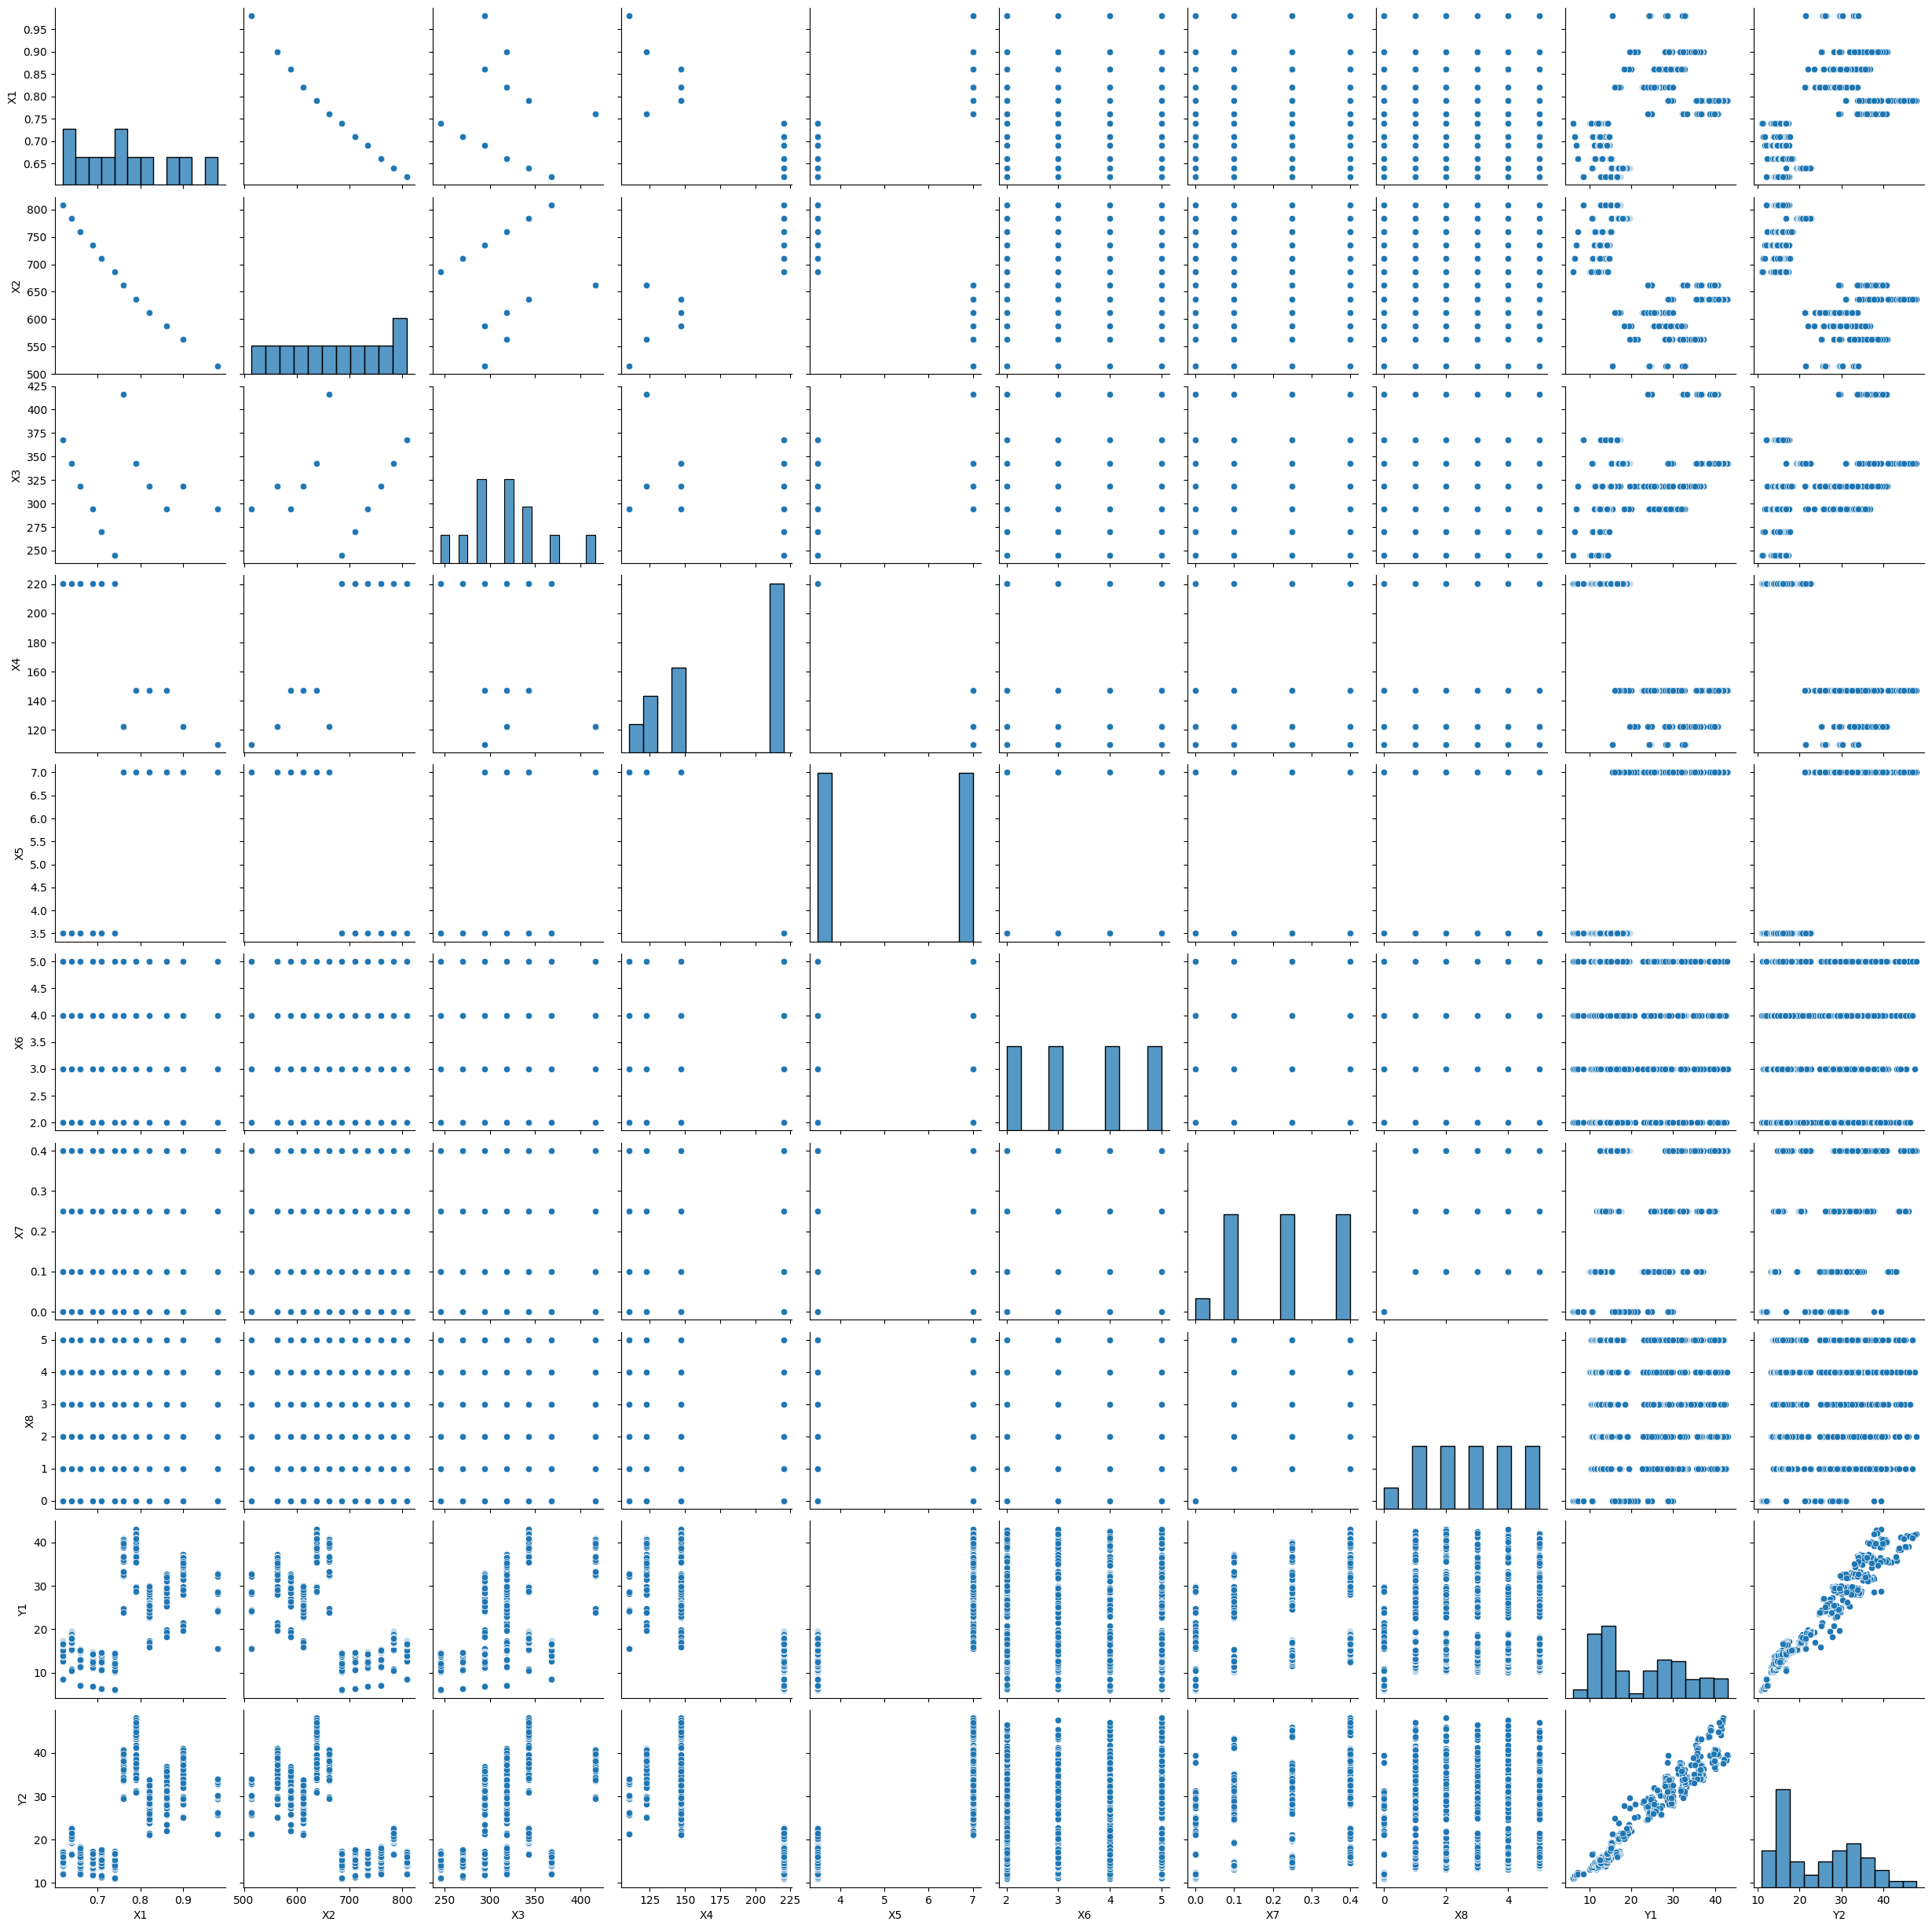

In [ ]:
sns.pairplot(df)

<Axes: >

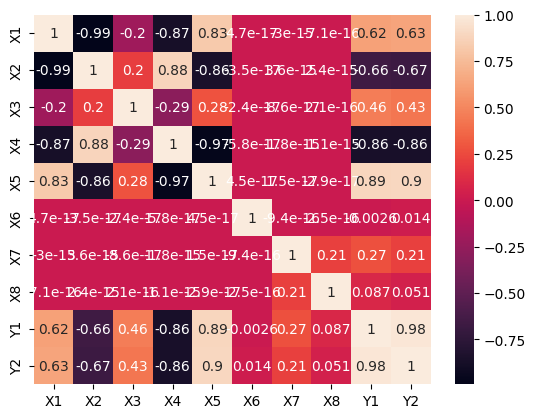

In [ ]:
sns.heatmap(df.corr(), annot=True)

Для начала построим полиномиальную модель регрессии для X1 и X2

In [ ]:
X=df.iloc[:,0:1]
Y=df.iloc[:,1]

In [ ]:
sk_lm = lm.LinearRegression()
sk_lm.fit(X, Y)
print("Парная линейная модель. R2=",sk_lm.score(X, Y))

Парная линейная модель. R2= 0.983868509551763


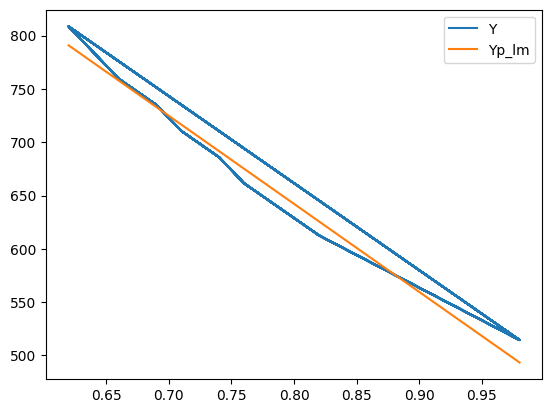

In [ ]:
Yp_lm=sk_lm.predict(X)
plt.plot(X, Y)
plt.plot(X, Yp_lm)
plt.legend(['Y','Yp_lm'])

Линейная регрессия не лучшим образом согласуется с данными

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# получение степеней Х
X_poly = PolynomialFeatures(degree = 3).fit_transform(X)
# сведение к множественной линейной
pol_m = LinearRegression().fit(X_poly, Y)
print("Парная полиномиальная модель. R2=",pol_m.score(X_poly, Y))

Парная полиномиальная модель. R2= 0.9991888333431744


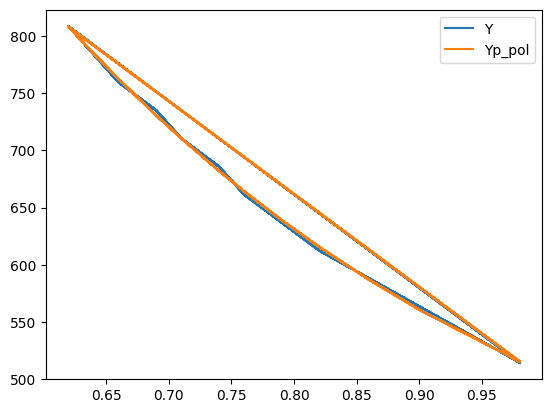

In [ ]:
Yp_pol=pol_m.predict(X_poly)
plt.plot(X, Y)
plt.plot(X, Yp_pol)
plt.legend(['Y','Yp_pol'])


Невероятно успешный результат, тем не менее изменим степень на 4, проверим как поведет себя критерий R2, если он будет меньше, то поставим число степеней 2, если при этом критерий возрастет, то модель со 2 степенью будет успешнее

In [ ]:
X_poly = PolynomialFeatures(degree = 4).fit_transform(X)
# сведение к множественной линейной
pol_m = LinearRegression().fit(X_poly, Y)
print("Парная полиномиальная модель. R2=",pol_m.score(X_poly, Y))
X_poly = PolynomialFeatures(degree = 2).fit_transform(X)
# сведение к множественной линейной
pol_m = LinearRegression().fit(X_poly, Y)
print("Парная полиномиальная модель. R2=",pol_m.score(X_poly, Y))

Парная полиномиальная модель. R2= 0.999346302049052
Парная полиномиальная модель. R2= 0.9991253439834341


R2 возрос, значит есть смысл проверять и дальше

In [ ]:
tmp = 0
for i in range(1, 100):
  X_poly = PolynomialFeatures(degree = i).fit_transform(X)
  pol_m = LinearRegression().fit(X_poly, Y)
  if tmp <= pol_m.score(X_poly, Y):
    tmp = pol_m.score(X_poly, Y)
  else:
    print(i, tmp)
    break

18 0.9999999999366587


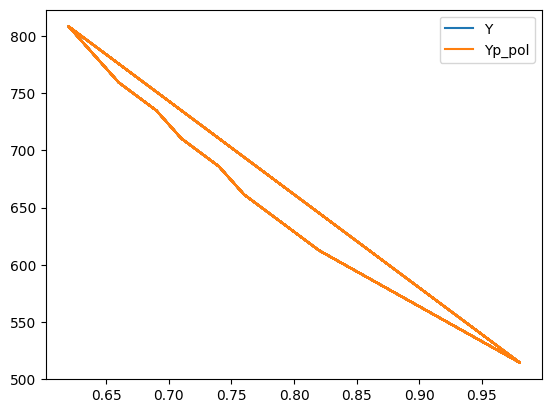

In [ ]:
X_poly = PolynomialFeatures(degree = 18).fit_transform(X)
pol_m = LinearRegression().fit(X_poly, Y)
Yp_pol=pol_m.predict(X_poly)
plt.plot(X, Y)
plt.plot(X, Yp_pol)
plt.legend(['Y','Yp_pol'])

Модель регрессии идеальна

Теперь рассмотрим парные непараметрические модели,
например, для переменных X1 и Y2 с коэффициентом корреляции 0,62.
Парные модели позволят использовать двумерные графики для визуализации
непараметрических моделей.

In [ ]:
X = df.iloc[:,0:1]
Y=df.iloc[:,9]
p_lin = lm.LinearRegression().fit(X,Y)
print("Линейная модель: R2=",p_lin.score(X, Y))
Yp_lin=p_lin.predict(X) # предсказания линейной модели

Линейная модель: R2= 0.40238605107921555


In [ ]:
from sklearn.ensemble import RandomForestRegressor
p_rf = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
p_rf.fit(X, Y)
print("Случайный лес: R2=",p_rf.score(X, Y))
Yp_rf=p_rf.predict(X)

Случайный лес: R2= 0.9216962736621618


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
p_knn = KNeighborsRegressor(n_neighbors=6)
p_knn.fit(X, Y)
print(" модель KNN: R2=",p_knn.score(X, Y))
Yp_knn=p_knn.predict(X)

 модель KNN: R2= 0.8232190301961088


In [ ]:
from sklearn.svm import SVR
p_svr = SVR(kernel='linear')
p_svr.fit(X, Y)
print("Модель SVR: R2=",p_svr.score(X, Y))
Yp_svr=p_svr.predict(X)

Модель SVR: R2= 0.30328804878439064


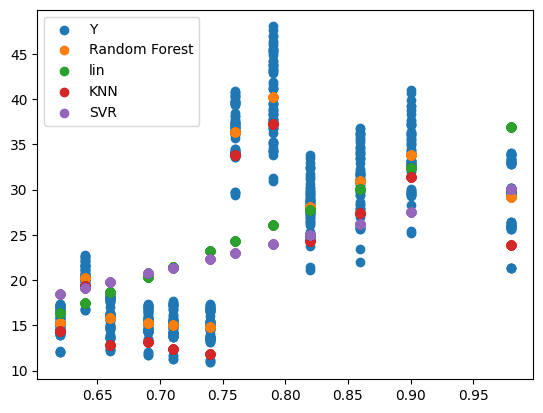

In [ ]:
plt.scatter(X, Y)
plt.scatter(X, Yp_rf)
plt.scatter(X, Yp_lin)
plt.scatter(X, Yp_knn)
plt.scatter(X, Yp_svr)
plt.legend(['Y','Random Forest', 'lin','KNN','SVR'])


In [ ]:
df1 = df.drop(['X1','X4'], axis=1)
df1.head()


,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2.0,0.0,0.0,15.55,21.33
1,514.5,294.0,7.0,3.0,0.0,0.0,15.55,21.33
2,514.5,294.0,7.0,4.0,0.0,0.0,15.55,21.33
3,514.5,294.0,7.0,5.0,0.0,0.0,15.55,21.33
4,563.5,318.5,7.0,2.0,0.0,0.0,20.84,28.28


In [ ]:
X = df1.iloc[:,0:6]
Y=df1.iloc[:,6:8]

In [ ]:
m_lin = lm.LinearRegression()
m_lin.fit(X, Y.Y2)
print("Линейная модель. R2=",m_lin.score(X, Y.Y2))

Линейная модель. R2= 0.8819328799280397


Text(0, 0.5, 'Yp_m_lin')

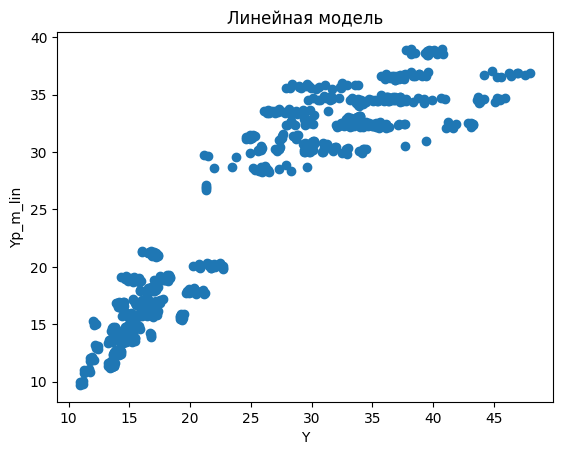

In [ ]:
Yp_m_lin=m_lin.predict(X)
plt.title('Линейная модель')
plt.scatter(Y.Y2, Yp_m_lin)
plt.xlabel('Y')
plt.ylabel('Yp_m_lin')

In [ ]:
X = df1.iloc[:,0:6]
Y=df1.iloc[:,7:8]

In [ ]:
m_rf = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
m_rf.fit(X, Y)
print("Случайный лес: R2=",m_rf.score(X, Y))
Yp_m_rf=m_rf.predict(X)

<ipython-input-142-802115fd64d8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rf.fit(X, Y)


Случайный лес: R2= 0.9963654488647999


Text(0, 0.5, 'Yp_m_rf')

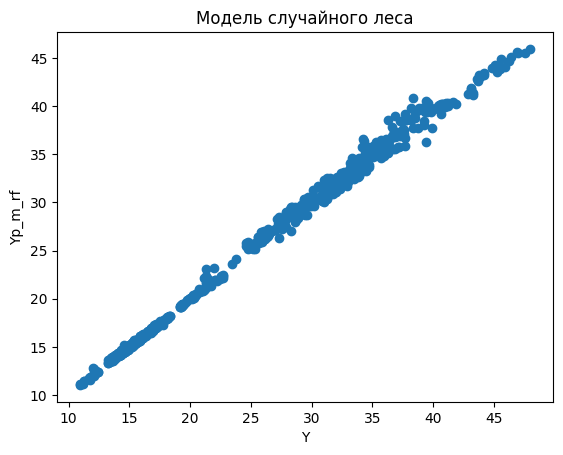

In [ ]:
plt.scatter(Y, Yp_m_rf)
plt.title('Mодель случайного леса')
plt.xlabel('Y')
plt.ylabel('Yp_m_rf')

In [ ]:
m_knn = KNeighborsRegressor(n_neighbors=6)
m_knn.fit(X, Y)
print(" Модель KNN: R2=",m_knn.score(X, Y))
Yp_m_knn=m_knn.predict(X)

 Модель KNN: R2= 0.9775732630627989


Text(0, 0.5, 'Yp_m_knn')

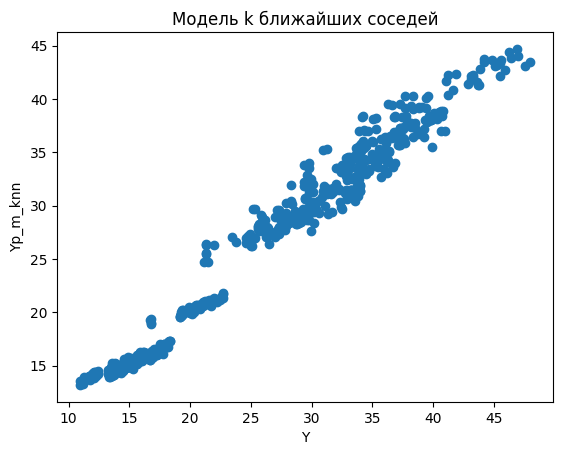

In [ ]:
plt.scatter(Y, Yp_m_knn)
plt.title('Mодель k ближайших соседей')
plt.xlabel('Y')
plt.ylabel('Yp_m_knn')

In [ ]:
m_svr = SVR(kernel='linear')
m_svr.fit(X, Y)
print("модель SVR: R2=",m_svr.score(X, Y))
Yp_m_svr1=m_svr.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


модель SVR: R2= 0.839646551318153


Text(0, 0.5, 'Yp_m_svr')

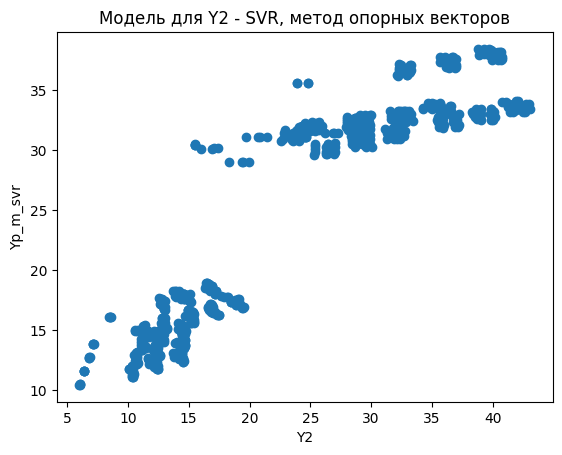

In [ ]:
plt.scatter(Y, Yp_m_svr1)
plt.title('Mодель для Y2 - SVR, метод опорных векторов')
plt.xlabel('Y2')
plt.ylabel('Yp_m_svr')

In [ ]:
X = df1.iloc[:,0:6]
Y=df1.iloc[:,6:7]

In [ ]:
m_svr = SVR(kernel='linear')
m_svr.fit(X, Y)
print("модель SVR: R2=",m_svr.score(X, Y))
Yp_m_svr2=m_svr.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


модель SVR: R2= 0.839646551318153


Text(0, 0.5, 'Yp_m_svr')

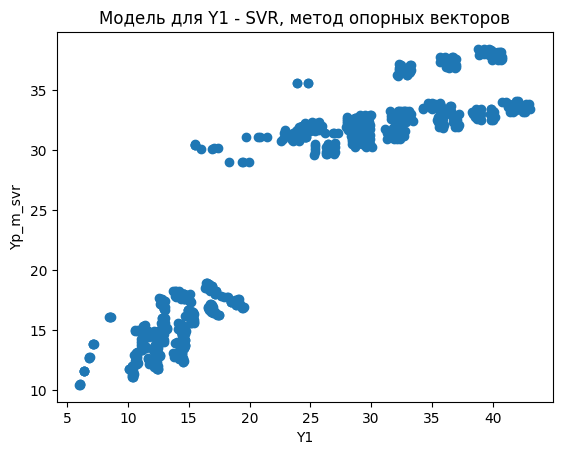

In [ ]:
plt.scatter(Y, Yp_m_svr1)
plt.title('Mодель для Y1 - SVR, метод опорных векторов')
plt.xlabel('Y1')
plt.ylabel('Yp_m_svr')

Text(0.5, 1.0, 'Диаграмма рассеяния')

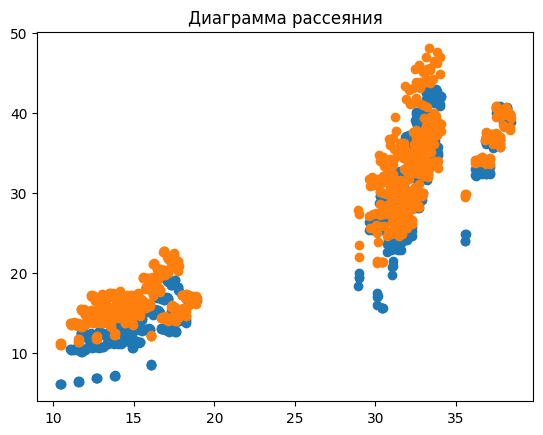

In [ ]:
plt.scatter(Yp_m_svr2, df.Y1, label='Mодель для Y1 - SVR')
plt.scatter(Yp_m_svr1, df.Y2, label='Mодель для Y2 - SVR')
plt.title('Диаграмма рассеяния')